# Лабораторная работа №3. Компьютерная геометрия.
Подмогильный Иван Александрович 

## Задание №1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from matplotlib import animation as animation
from rotations import xy_rotation, center_rotation

In [2]:
def myplot(x, y):
    fig = plt.figure( figsize=(10, 10) )
    ax = fig.add_subplot(1, 1, 1)
    ax.set_aspect('equal')
    ax.grid()
    ax.plot(x, y)

def rot_mat(delta):
    return np.array([[np.cos(delta), np.sin(delta)],
                   [-np.sin(delta), np.cos(delta)]])

In [3]:
th = np.linspace(0, np.pi*2, 1000)

def conventional_circle(th):
    # Conventional circle definition
    r = 2
    x = np.array(r * np.cos(th))
    y = np.array(r * np.sin(th))
    return x, y


def optimized_circle(th):
    # Optimized circle definition
    xy = np.zeros([1000, 2])
    xy[0] = np.array([1, 0])
    delta = 2 * np.pi / 1000
    rot = rot_mat(delta)

    for i in range(1, 1000):
        xy[i] = xy[i-1] @ rot

    return xy


In [4]:
%%timeit -t
x, y = conventional_circle(th)

46.1 µs ± 5.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
x, y = conventional_circle(th)


In [6]:
%%timeit -t
xy = optimized_circle(th)

2.29 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
xy = optimized_circle(th)


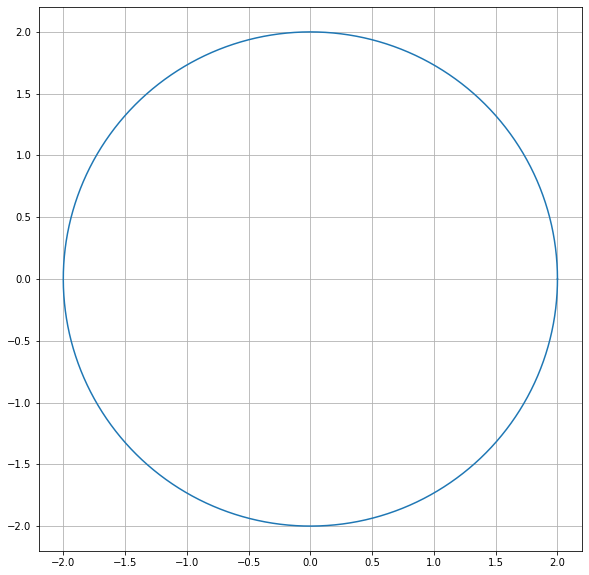

In [8]:
myplot(x, y)

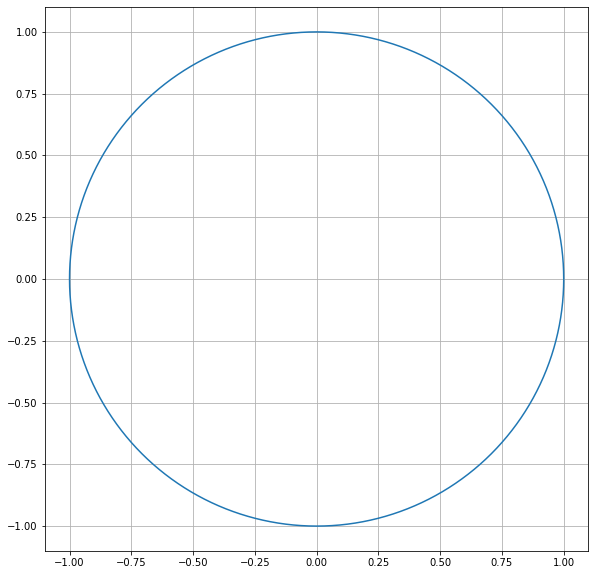

In [9]:
myplot(xy[:, 0], xy[:, 1])

## Задание №2

1. Нарисовать эпитрохоиду или гипотрохоиду используя параметрические уравнения этих кривых.
2. Нарисовать эпитрохоиду или гипотрохоиду используя лишь повороты точек катящейся окружности.
3. Рисунок 7 показывает из каких поворотов состоит перемещение точки циклоидальной кривой 𝑃.
Вначале точка 𝑃 поворачивается вокруг центра большой окружности 𝑂 на угол 𝜑 и переходит
в точку 𝑃𝜑. Затем 𝑃𝜑 поворачивается вокруг центра 𝑜𝜑 на угол 𝜃. Ваша задача заключается
в том, чтобы правильно вычислить угол 𝜃. Он полностью определяется углом 𝜑 и радиусами
окружностей 𝑅 и 𝑟.

Формула для параметрического задания:
$ 𝑥(𝑡) = 𝑅(1 − 𝑘) cos(𝑘𝑡) + 𝑑 cos((1 − 𝑘)𝑡) $
$ 𝑦(𝑡) = 𝑅(1 − 𝑘) sin(𝑘𝑡) − 𝑑 sin((1 − 𝑘)𝑡) $

In [10]:
def parametric_hyp(r, R, d):
    k = R / r
    fi = np.linspace(0, np.pi * 2, 1000)
    t = fi / k
    x = np.array( R * (1 - k) * np.cos(k * t) + d * np.cos((1 - k) * t) )
    y = np.array( R * (1 - k) * np.sin(k * t) - d * np.sin((1 - k) * t) )
    return x, y

def rotation_hyp(r, R, d):
    # Angle for big circle
    delta = 2 * np.pi / 1000
    xy = np.zeros([1000, 2])
    xy[0] = np.array([R + d, 0])
    len_ = R * delta
    # Angle for small circle
    theta = len_ / r

    for i in range(1, 1000):
        out_rotated = xy[0] @ rot_mat(delta * i)
        in_rotated = xy_rotation(out_rotated, [0, 0], rad=delta * i)
        xy[i] = in_rotated
    return xy


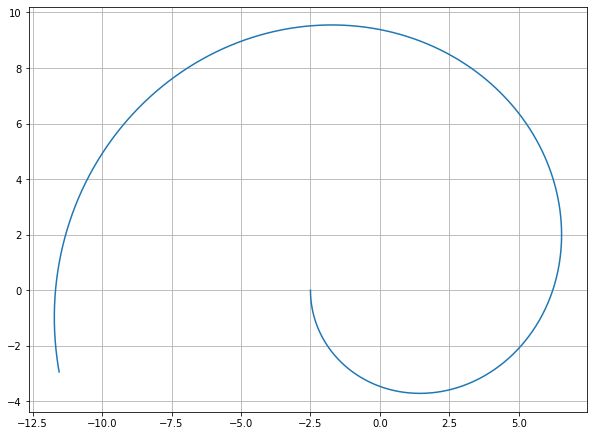

In [11]:
x, y = parametric_hyp(2, 5, 5)
myplot(x, y)

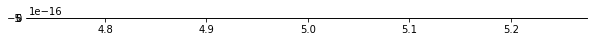

In [12]:
xy = rotation_hyp(2, 5, 0)
myplot(xy[:, 0], xy[:, 1])


In [13]:
xy

array([[ 5.00000000e+00,  0.00000000e+00],
       [ 5.00000000e+00,  6.05087977e-18],
       [ 5.00000000e+00,  1.45339597e-17],
       ...,
       [ 5.00000000e+00, -7.84930464e-18],
       [ 5.00000000e+00, -8.68743816e-19],
       [ 5.00000000e+00, -6.06526139e-18]])